In [7]:
import sys, imp, os
from functools import reduce
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import nasdaqdatalink as ndl
import yaml
from tools.instruments import instruments, Quotes
from tools.constants import SRF_CONTINUOUS_BO_DB_PATH
from tools.display import ohlc_chart, view, oi_chart, metrics_chart, index_chart
import backtesting as bt
import re
from tools.display import MyFormatter

In [8]:
with open('03.전략연구/systems/system2.yaml', encoding='utf-8') as f:
    system1 = yaml.load(f, Loader=yaml.FullLoader)
    print(system1)

{'name': None, 'description': '시스템 설명', 'quotes_style': 'bo', 'sectors': 'default', 'instruments': None, 'from_date': '2016-08-01', 'to_date': None, 'principal': 1000000, 'heat_system': 'DefaultHeat', 'max_system_heat': 0.3, 'max_sector_heat': 0.3, 'max_trade_heat': 0.1, 'max_lots': 1, 'commission': 5.98, 'skid': 0.25, 'metrics': [['ema30', 'EMA', 'window=30'], ['ema5', 'EMA', 'window=5'], ['min30', 'MIN', 'window=30'], ['max300', 'MAX', 'window=300']], 'entry_rule': {'long': 'ema5>ema30', 'short': None}, 'exit_rule': {'long': 'ema5<ema30', 'short': None}, 'stop_rule': {'long': 'min30', 'short': None}}


In [9]:
trader = bt.Trader(quotes_style='bo', systems=[system1])
system = trader.systems[0]

In [10]:
%%time
trader.run()

매매시작
거래일: 2016-08-01 00:00:00, 시스템: None 2.984799385070801sec
거래일: 2016-08-02 00:00:00, 시스템: None 0.03702282905578613sec
거래일: 2016-08-03 00:00:00, 시스템: None 0.03432655334472656sec
거래일: 2016-08-04 00:00:00, 시스템: None 0.03281116485595703sec
거래일: 2016-08-05 00:00:00, 시스템: None 0.030006885528564453sec
거래일: 2016-08-08 00:00:00, 시스템: None 0.029006481170654297sec
거래일: 2016-08-09 00:00:00, 시스템: None 0.03100728988647461sec
거래일: 2016-08-10 00:00:00, 시스템: None 0.029006004333496094sec
거래일: 2016-08-11 00:00:00, 시스템: None 0.030009746551513672sec
거래일: 2016-08-12 00:00:00, 시스템: None 0.03200507164001465sec
거래일: 2016-08-15 00:00:00, 시스템: None 0.032007455825805664sec
거래일: 2016-08-16 00:00:00, 시스템: None 0.03300833702087402sec
거래일: 2016-08-17 00:00:00, 시스템: None 0.03200793266296387sec
거래일: 2016-08-18 00:00:00, 시스템: None 0.033022403717041016sec
거래일: 2016-08-19 00:00:00, 시스템: None 0.032042503356933594sec
거래일: 2016-08-22 00:00:00, 시스템: None 0.029989957809448242sec
거래일: 2016-08-23 00:00:00, 시스템: None 0.0300095

거래일: 2017-02-10 00:00:00, 시스템: None 0.0372772216796875sec
거래일: 2017-02-13 00:00:00, 시스템: None 0.03781318664550781sec
거래일: 2017-02-14 00:00:00, 시스템: None 0.036940813064575195sec
거래일: 2017-02-15 00:00:00, 시스템: None 0.03600788116455078sec
거래일: 2017-02-16 00:00:00, 시스템: None 0.03861069679260254sec
거래일: 2017-02-17 00:00:00, 시스템: None 0.03392171859741211sec
거래일: 2017-02-20 00:00:00, 시스템: None 0.03600788116455078sec
거래일: 2017-02-21 00:00:00, 시스템: None 0.005001068115234375sec
거래일: 2017-02-22 00:00:00, 시스템: None 0.033008575439453125sec
거래일: 2017-02-23 00:00:00, 시스템: None 0.03727602958679199sec
거래일: 2017-02-24 00:00:00, 시스템: None 0.03793072700500488sec
거래일: 2017-02-27 00:00:00, 시스템: None 0.0400087833404541sec
거래일: 2017-02-28 00:00:00, 시스템: None 0.036006927490234375sec
거래일: 2017-03-01 00:00:00, 시스템: None 0.03399491310119629sec
거래일: 2017-03-02 00:00:00, 시스템: None 0.033415794372558594sec
거래일: 2017-03-03 00:00:00, 시스템: None 0.03360867500305176sec
거래일: 2017-03-06 00:00:00, 시스템: None 0.030998468399047

거래일: 2017-09-04 00:00:00, 시스템: None 0.03201556205749512sec
거래일: 2017-09-05 00:00:00, 시스템: None 0.007001638412475586sec
거래일: 2017-09-06 00:00:00, 시스템: None 0.034058332443237305sec
거래일: 2017-09-07 00:00:00, 시스템: None 0.036995649337768555sec
거래일: 2017-09-08 00:00:00, 시스템: None 0.037001609802246094sec
거래일: 2017-09-11 00:00:00, 시스템: None 0.03800153732299805sec
거래일: 2017-09-12 00:00:00, 시스템: None 0.04000234603881836sec
거래일: 2017-09-13 00:00:00, 시스템: None 0.036023855209350586sec
거래일: 2017-09-14 00:00:00, 시스템: None 0.03900647163391113sec
거래일: 2017-09-15 00:00:00, 시스템: None 0.03900885581970215sec
거래일: 2017-09-18 00:00:00, 시스템: None 0.03896903991699219sec
거래일: 2017-09-19 00:00:00, 시스템: None 0.0370175838470459sec
거래일: 2017-09-20 00:00:00, 시스템: None 0.03500795364379883sec
거래일: 2017-09-21 00:00:00, 시스템: None 0.0390009880065918sec
거래일: 2017-09-22 00:00:00, 시스템: None 0.03400230407714844sec
거래일: 2017-09-25 00:00:00, 시스템: None 0.03202033042907715sec
거래일: 2017-09-26 00:00:00, 시스템: None 0.029006481170654

거래일: 2018-04-04 00:00:00, 시스템: None 0.04501175880432129sec
거래일: 2018-04-05 00:00:00, 시스템: None 0.044106245040893555sec
거래일: 2018-04-06 00:00:00, 시스템: None 0.041913509368896484sec
거래일: 2018-04-09 00:00:00, 시스템: None 0.03515148162841797sec
거래일: 2018-04-10 00:00:00, 시스템: None 0.03302192687988281sec
거래일: 2018-04-11 00:00:00, 시스템: None 0.03300642967224121sec
거래일: 2018-04-12 00:00:00, 시스템: None 0.02887582778930664sec
거래일: 2018-04-13 00:00:00, 시스템: None 0.03113842010498047sec
거래일: 2018-04-16 00:00:00, 시스템: None 0.029999256134033203sec
거래일: 2018-04-17 00:00:00, 시스템: None 0.0319371223449707sec
거래일: 2018-04-18 00:00:00, 시스템: None 0.04087948799133301sec
거래일: 2018-04-19 00:00:00, 시스템: None 0.05401253700256348sec
거래일: 2018-04-20 00:00:00, 시스템: None 0.042008399963378906sec
거래일: 2018-04-23 00:00:00, 시스템: None 0.03799271583557129sec
거래일: 2018-04-24 00:00:00, 시스템: None 0.03700852394104004sec
거래일: 2018-04-25 00:00:00, 시스템: None 0.03000783920288086sec
거래일: 2018-04-26 00:00:00, 시스템: None 0.031006574630737

거래일: 2018-10-29 00:00:00, 시스템: None 0.02791881561279297sec
거래일: 2018-10-30 00:00:00, 시스템: None 0.031015396118164062sec
거래일: 2018-10-31 00:00:00, 시스템: None 0.029013633728027344sec
거래일: 2018-11-01 00:00:00, 시스템: None 0.026006460189819336sec
거래일: 2018-11-02 00:00:00, 시스템: None 0.022996187210083008sec
거래일: 2018-11-05 00:00:00, 시스템: None 0.027014970779418945sec
거래일: 2018-11-06 00:00:00, 시스템: None 0.02600574493408203sec
거래일: 2018-11-07 00:00:00, 시스템: None 0.025990962982177734sec
거래일: 2018-11-08 00:00:00, 시스템: None 0.024579524993896484sec
거래일: 2018-11-09 00:00:00, 시스템: None 0.026007652282714844sec
거래일: 2018-11-12 00:00:00, 시스템: None 0.024004459381103516sec
거래일: 2018-11-13 00:00:00, 시스템: None 0.0252835750579834sec
거래일: 2018-11-14 00:00:00, 시스템: None 0.025005817413330078sec
거래일: 2018-11-15 00:00:00, 시스템: None 0.022021770477294922sec
거래일: 2018-11-16 00:00:00, 시스템: None 0.025005578994750977sec
거래일: 2018-11-19 00:00:00, 시스템: None 0.025003671646118164sec
거래일: 2018-11-20 00:00:00, 시스템: None 0.027005

거래일: 2019-05-24 00:00:00, 시스템: None 0.027113914489746094sec
거래일: 2019-05-27 00:00:00, 시스템: None 0.02689838409423828sec
거래일: 2019-05-28 00:00:00, 시스템: None 0.007001638412475586sec
거래일: 2019-05-29 00:00:00, 시스템: None 0.031001806259155273sec
거래일: 2019-05-30 00:00:00, 시스템: None 0.02794194221496582sec
거래일: 2019-05-31 00:00:00, 시스템: None 0.03236198425292969sec
거래일: 2019-06-03 00:00:00, 시스템: None 0.034006357192993164sec
거래일: 2019-06-04 00:00:00, 시스템: None 0.029007673263549805sec
거래일: 2019-06-05 00:00:00, 시스템: None 0.028005123138427734sec
거래일: 2019-06-06 00:00:00, 시스템: None 0.029006004333496094sec
거래일: 2019-06-07 00:00:00, 시스템: None 0.029007434844970703sec
거래일: 2019-06-10 00:00:00, 시스템: None 0.04501652717590332sec
거래일: 2019-06-11 00:00:00, 시스템: None 0.04372835159301758sec
거래일: 2019-06-12 00:00:00, 시스템: None 0.04001212120056152sec
거래일: 2019-06-13 00:00:00, 시스템: None 0.04016375541687012sec
거래일: 2019-06-14 00:00:00, 시스템: None 0.04619956016540527sec
거래일: 2019-06-17 00:00:00, 시스템: None 0.0450515747

거래일: 2019-12-13 00:00:00, 시스템: None 0.03500771522521973sec
거래일: 2019-12-16 00:00:00, 시스템: None 0.033098697662353516sec
거래일: 2019-12-17 00:00:00, 시스템: None 0.03491497039794922sec
거래일: 2019-12-18 00:00:00, 시스템: None 0.03411054611206055sec
거래일: 2019-12-19 00:00:00, 시스템: None 0.03498411178588867sec
거래일: 2019-12-20 00:00:00, 시스템: None 0.03607463836669922sec
거래일: 2019-12-23 00:00:00, 시스템: None 0.041008710861206055sec
거래일: 2019-12-24 00:00:00, 시스템: None 0.039008378982543945sec
거래일: 2019-12-26 00:00:00, 시스템: None 0.041010141372680664sec
거래일: 2019-12-27 00:00:00, 시스템: None 0.04202461242675781sec
거래일: 2019-12-30 00:00:00, 시스템: None 0.04201006889343262sec
거래일: 2019-12-31 00:00:00, 시스템: None 0.04500913619995117sec
거래일: 2020-01-02 00:00:00, 시스템: None 0.03899335861206055sec
거래일: 2020-01-03 00:00:00, 시스템: None 0.04153919219970703sec
거래일: 2020-01-06 00:00:00, 시스템: None 0.04583120346069336sec
거래일: 2020-01-07 00:00:00, 시스템: None 0.04800915718078613sec
거래일: 2020-01-08 00:00:00, 시스템: None 0.05702924728393

거래일: 2020-07-09 00:00:00, 시스템: None 0.04601025581359863sec
거래일: 2020-07-10 00:00:00, 시스템: None 0.04700636863708496sec
거래일: 2020-07-13 00:00:00, 시스템: None 0.04300189018249512sec
거래일: 2020-07-14 00:00:00, 시스템: None 0.04101681709289551sec
거래일: 2020-07-15 00:00:00, 시스템: None 0.042002201080322266sec
거래일: 2020-07-16 00:00:00, 시스템: None 0.04062795639038086sec
거래일: 2020-07-17 00:00:00, 시스템: None 0.04016399383544922sec
거래일: 2020-07-20 00:00:00, 시스템: None 0.03832674026489258sec
거래일: 2020-07-21 00:00:00, 시스템: None 0.038285255432128906sec
거래일: 2020-07-22 00:00:00, 시스템: None 0.04265618324279785sec
거래일: 2020-07-23 00:00:00, 시스템: None 0.04501152038574219sec
거래일: 2020-07-24 00:00:00, 시스템: None 0.04700326919555664sec
거래일: 2020-07-27 00:00:00, 시스템: None 0.05292797088623047sec
거래일: 2020-07-28 00:00:00, 시스템: None 0.05335235595703125sec
거래일: 2020-07-29 00:00:00, 시스템: None 0.051091909408569336sec
거래일: 2020-07-30 00:00:00, 시스템: None 0.047629356384277344sec
거래일: 2020-07-31 00:00:00, 시스템: None 0.05478549003601

거래일: 2021-01-26 00:00:00, 시스템: None 0.04902791976928711sec
거래일: 2021-01-27 00:00:00, 시스템: None 0.047094106674194336sec
거래일: 2021-01-28 00:00:00, 시스템: None 0.04591965675354004sec
거래일: 2021-01-29 00:00:00, 시스템: None 0.04601407051086426sec
거래일: 2021-02-01 00:00:00, 시스템: None 0.04171586036682129sec
거래일: 2021-02-02 00:00:00, 시스템: None 0.03930497169494629sec
거래일: 2021-02-03 00:00:00, 시스템: None 0.03999161720275879sec
거래일: 2021-02-04 00:00:00, 시스템: None 0.039110660552978516sec
거래일: 2021-02-05 00:00:00, 시스템: None 0.040010690689086914sec
거래일: 2021-02-08 00:00:00, 시스템: None 0.04058694839477539sec
거래일: 2021-02-09 00:00:00, 시스템: None 0.039450645446777344sec
거래일: 2021-02-10 00:00:00, 시스템: None 0.03702497482299805sec
거래일: 2021-02-11 00:00:00, 시스템: None 0.03824925422668457sec
거래일: 2021-02-12 00:00:00, 시스템: None 0.0400238037109375sec
거래일: 2021-02-15 00:00:00, 시스템: None 0.04000115394592285sec
거래일: 2021-02-16 00:00:00, 시스템: None 0.006009101867675781sec
거래일: 2021-02-17 00:00:00, 시스템: None 0.04299449920654

거래일: 2021-08-19 00:00:00, 시스템: None 0.03902292251586914sec
거래일: 2021-08-20 00:00:00, 시스템: None 0.03301286697387695sec
거래일: 2021-08-23 00:00:00, 시스템: None 0.031050682067871094sec
거래일: 2021-08-24 00:00:00, 시스템: None 0.030414104461669922sec
거래일: 2021-08-25 00:00:00, 시스템: None 0.027861595153808594sec
거래일: 2021-08-26 00:00:00, 시스템: None 0.03380608558654785sec
거래일: 2021-08-27 00:00:00, 시스템: None 0.03775954246520996sec
거래일: 2021-08-30 00:00:00, 시스템: None 0.029253482818603516sec
거래일: 2021-08-31 00:00:00, 시스템: None 0.03810739517211914sec
거래일: 2021-09-01 00:00:00, 시스템: None 0.039008140563964844sec
거래일: 2021-09-02 00:00:00, 시스템: None 0.03707695007324219sec
거래일: 2021-09-03 00:00:00, 시스템: None 0.04279899597167969sec
거래일: 2021-09-06 00:00:00, 시스템: None 0.04600954055786133sec
거래일: 2021-09-07 00:00:00, 시스템: None 0.009056806564331055sec
거래일: 2021-09-08 00:00:00, 시스템: None 0.04795217514038086sec
거래일: 2021-09-09 00:00:00, 시스템: None 0.04200100898742676sec
거래일: 2021-09-10 00:00:00, 시스템: None 0.036263704299

거래일: 2022-03-10 00:00:00, 시스템: None 0.03600740432739258sec
거래일: 2022-03-11 00:00:00, 시스템: None 0.036144256591796875sec
거래일: 2022-03-14 00:00:00, 시스템: None 0.039859771728515625sec
거래일: 2022-03-15 00:00:00, 시스템: None 0.03600883483886719sec
거래일: 2022-03-16 00:00:00, 시스템: None 0.03301286697387695sec
거래일: 2022-03-17 00:00:00, 시스템: None 0.03499865531921387sec
거래일: 2022-03-18 00:00:00, 시스템: None 0.034024953842163086sec
거래일: 2022-03-21 00:00:00, 시스템: None 0.03700900077819824sec
거래일: 2022-03-22 00:00:00, 시스템: None 0.046010732650756836sec
거래일: 2022-03-23 00:00:00, 시스템: None 0.04600191116333008sec
거래일: 2022-03-24 00:00:00, 시스템: None 0.043003082275390625sec
거래일: 2022-03-25 00:00:00, 시스템: None 0.04721379280090332sec
거래일: 2022-03-28 00:00:00, 시스템: None 0.044591665267944336sec
거래일: 2022-03-29 00:00:00, 시스템: None 0.04039740562438965sec
거래일: 2022-03-30 00:00:00, 시스템: None 0.03660273551940918sec
거래일: 2022-03-31 00:00:00, 시스템: None 0.04201030731201172sec
거래일: 2022-04-01 00:00:00, 시스템: None 0.038024187088

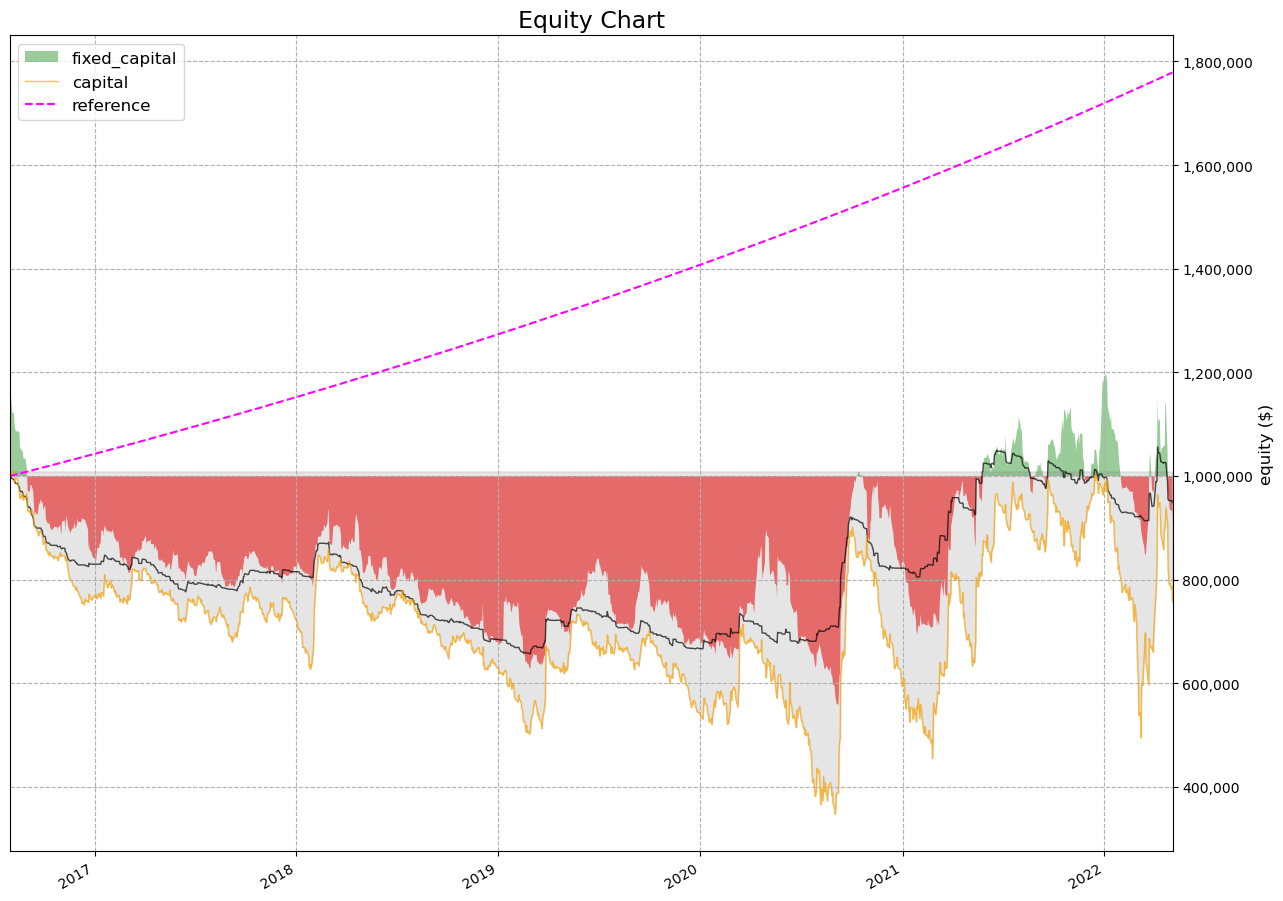

,투자금,최종자산,총손익,Bliss,CAGR,MDD,손익비,승률,위험대비손익,평균손익,평균수익,평균손실,보유기간,매매회수
Result,"1,000,000","757,546",-24.2%,-0.001,-4.7%,65.6%,-0.98,23.8%,-3.0%,-28,"5,106","-1,629",28 일,1502


In [11]:
system.summary(level=0)

In [12]:
system.summary(level=1)

,총손익,평균손익,표준편차,위험대비손익,승률,보유기간,매매회수
구분,,,,,,,
equity,181304,996,9542.76,4.44%,30.2%,39.340659,182
petroleum,53238,339,6091.30,-2.13%,25.5%,29.605096,157
grain,33494,155,3140.27,14.49%,23.1%,28.513889,216
fiber,9715,304,2610.21,19.44%,34.4%,38.000000,32
interest-rate,-7958,-50,2336.61,1.03%,23.4%,25.360759,158
meat,-30430,-371,2165.15,-13.74%,19.5%,26.536585,82
tropical,-32856,-213,1851.87,-11.77%,24.7%,24.707792,154
currency,-116478,-367,1647.83,-15.91%,19.2%,24.290221,317
metal,-131974,-620,8526.86,-4.47%,23.0%,26.539906,213


In [13]:
instruments['MD']

[MD] CME S&P 400 Midcap Index

In [29]:
instruments.get_symbols()

['AD',
 'AL',
 'ATW',
 'B',
 'BO',
 'BP',
 'C',
 'CC',
 'CD',
 'CL',
 'CT',
 'CU',
 'DA',
 'DX',
 'EC',
 'ED',
 'ES',
 'FBTP',
 'FDAX',
 'FESX',
 'FF',
 'FGBL',
 'FGBM',
 'FGBS',
 'FOAT',
 'FV',
 'G',
 'GC',
 'HG',
 'HO',
 'I',
 'JY',
 'KC',
 'KW',
 'L',
 'LB',
 'LC',
 'LN',
 'M',
 'MD',
 'MP',
 'MW',
 'NE',
 'NG',
 'NK',
 'NQ',
 'O',
 'OJ',
 'PA',
 'PB',
 'PL',
 'R',
 'RB',
 'RF',
 'RR',
 'RS1',
 'RTY',
 'RU',
 'S',
 'SB',
 'SF',
 'SI',
 'SM',
 'SP',
 'SXF',
 'T',
 'TF',
 'TU',
 'TY',
 'US',
 'VX',
 'W',
 'YM',
 'Z',
 'ZN',
 'FC']

In [13]:
system.metrics['CL'].loc['2016-10-28':]

,ema30,ema5,min300,max300
date,,,,
2016-10-28,58.388825,58.609106,44.909954,73.549934
2016-10-31,58.230081,57.719392,44.909954,73.549934
2016-11-01,58.069360,57.062915,44.909954,73.549934
2016-11-02,57.832934,56.181931,44.909954,73.549934
2016-11-03,57.567842,55.367942,44.909954,73.549934
...,...,...,...,...
2022-04-28,101.547746,102.902362,48.659988,126.380005
2022-04-29,101.750616,103.498242,48.659988,126.380005
2022-05-02,101.971367,104.055494,48.659988,126.380005


,총손익,총손익(틱),평균손익(틱),표준편차(틱),위험대비손익,승률,보유기간,매매회수
결과,"-27,990","-2,799",-175,172,-16.62%,12.5%,15,16


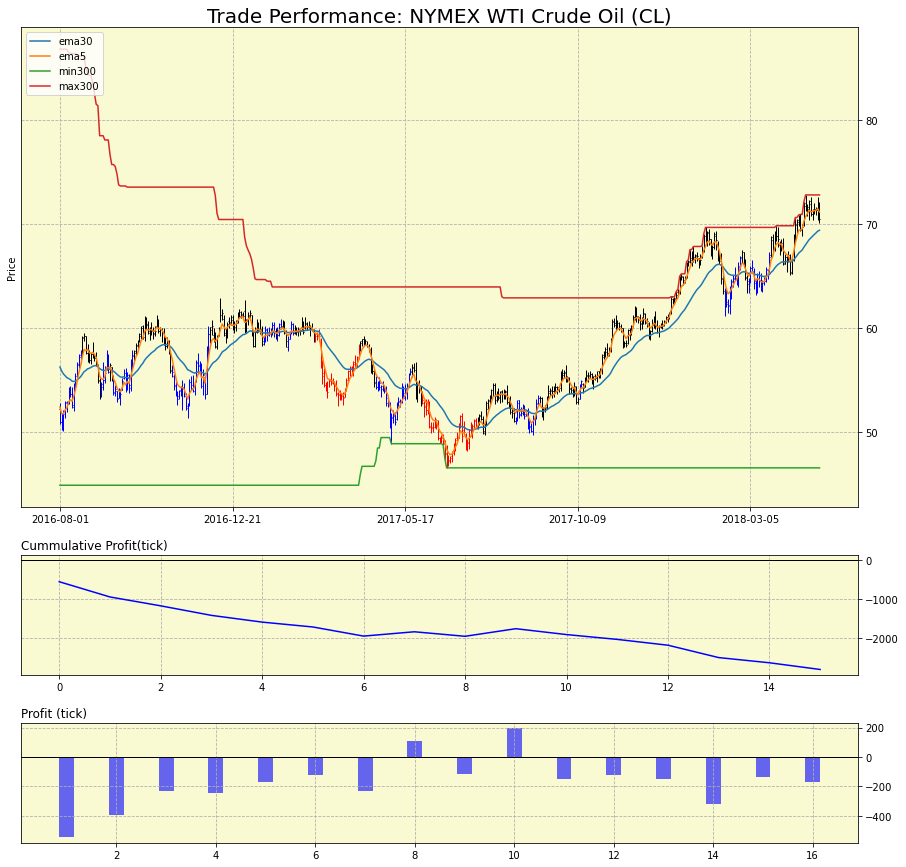

In [13]:
system.detail_result('CL')#, start='2015-10-01', end='2016-01-13')

,총손익,총손익(틱),평균손익(틱),표준편차(틱),위험대비손익,승률,보유기간,매매회수
결과,"13,330","1,333",67,260,26.25%,75.0%,12,20


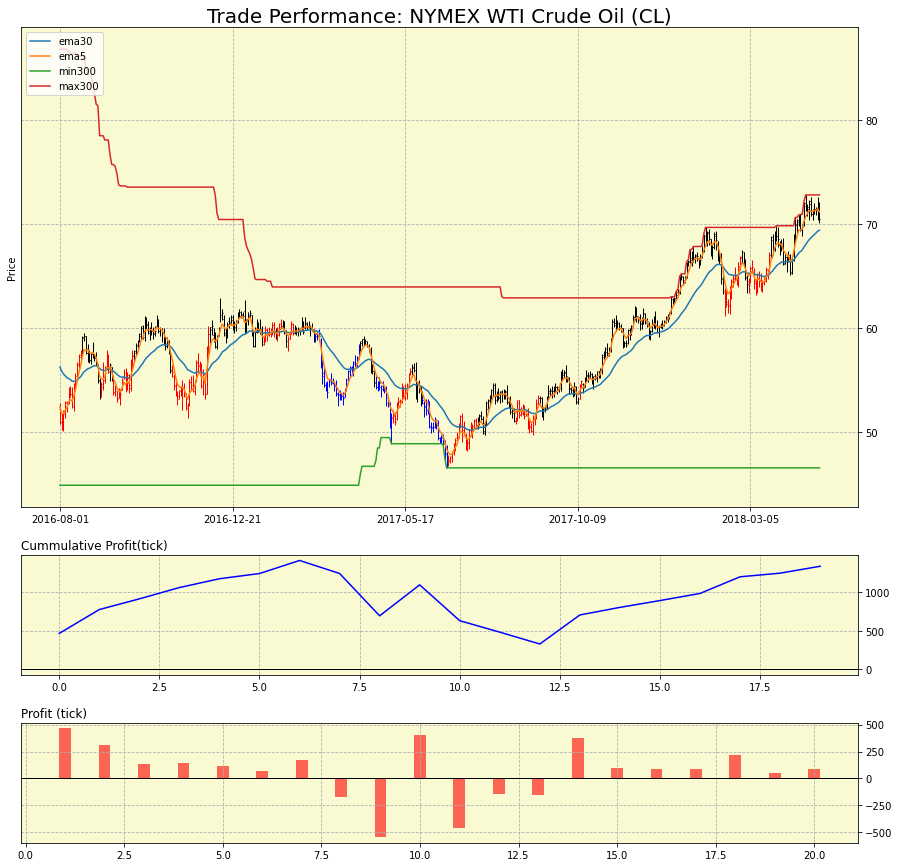

In [18]:
system.detail_result('CL')#, start='2015-10-01', end='2016-01-13')

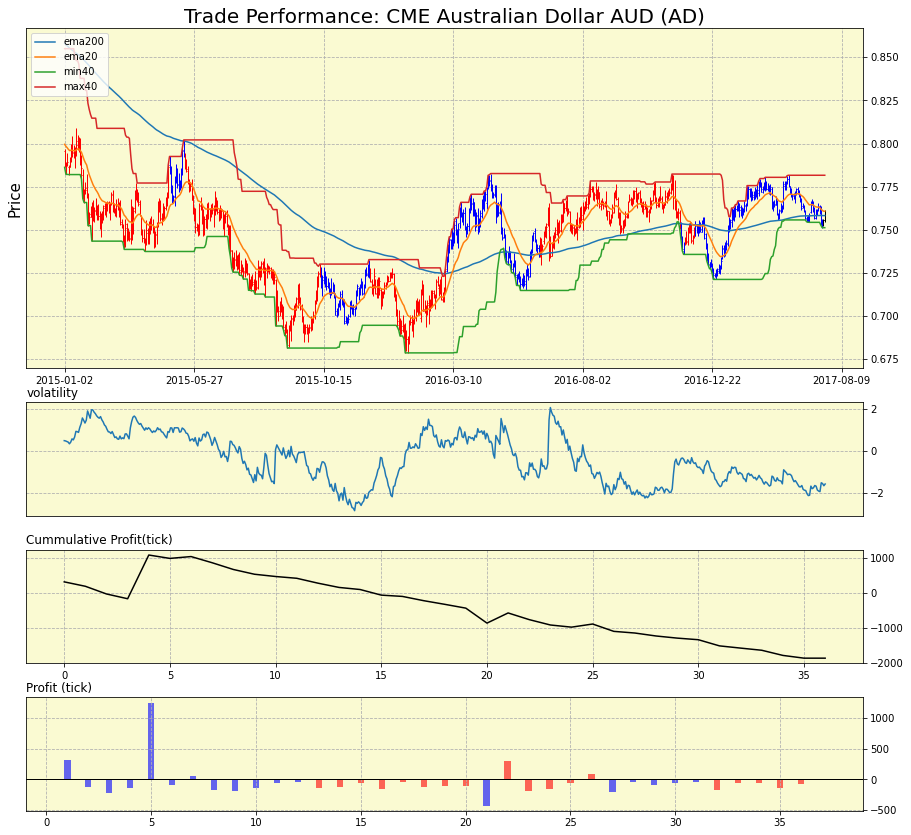

In [11]:
cumprofit = trades.profit_ticks.cumsum()
num_trades = len(trades)
       
index_rows = sum([1 for i in metrics.attrs['type'].values() if i == 'index'])
xsize = 15
ysize = 12*(1 + 0.2*index_rows)
linewidth = 1

fig, (ax) = plt.subplots(3+index_rows, 1, figsize=(xsize, ysize),
       gridspec_kw = {'height_ratios':[3,1,1]+[1]*index_rows})

win_masks = []
lose_masks =[]

for idx, row in trades.iterrows():
    
    mask = (quotes['date'] >= row['entrydate']) & (quotes['date'] <= row['exitdate'])
    if row['result'] == 'WIN':
        win_masks.append(mask)
    elif row['result'] == 'LOSE':
        lose_masks.append(mask)
        
win_mask = reduce(np.logical_or, win_masks)
lose_mask = reduce(np.logical_or, lose_masks)


win_dates = quotes[win_mask].index
lose_dates = quotes[lose_mask].index
neutral_dates = quotes[~win_mask & ~lose_mask].index
dates = [win_dates, lose_dates, neutral_dates]
colors = ['r', 'b', 'k']

offset = 0.3




#1. Trade Performance Chart
for date, color in zip(dates, colors):
    o = quotes.loc[date, 'open'].values
    h = quotes.loc[date, 'high'].values
    l = quotes.loc[date, 'low'].values
    c = quotes.loc[date, 'close'].values
    
    ax[0].vlines(date, l, h, linewidth=linewidth, color=color)
    ax[0].hlines(o, date-offset, date, linewidth=linewidth, color=color)
    ax[0].hlines(c, date, date+offset, linewidth=linewidth, color=color)
    

    
#2. Metric Chart
metric_type = {
    'price':[k for k, v in metrics.attrs['type'].items() if v=='price' ],
    'index':[k for k, v in metrics.attrs['type'].items() if v=='index' ]
}

for metric in metric_type['price']:
    ax[0].plot(quotes.index, metrics[metric], label=metric)


title = f"Trade Performance: {name} ({symbol})"
ax[0].set_title(title, fontsize=20)
ax[0].set_ylabel('Price', fontsize=15)
ax[0].legend(loc=2)
#ax[0].grid(linestyle='--')
#ax[0].set_facecolor('lightgoldenrodyellow')
#ax[0].yaxis.tick_right()

#x축 fomatter
myformatter = MyFormatter(datesindex)
ax[0].xaxis.set_major_formatter(myformatter)

#3.Index Chart
for axis, name in zip(ax[1:-1], metric_type['index']):
    axis.set_title(name, loc='left')
    #axis.set_ylabel(name, fontsize=15)
    axis.plot(quotes.index, metrics[name])
    axis.set_xticks([])


#4. Cummulative Profit Chart
ax[-2].plot(cumprofit, color='k')
ax[-2].set_title('Cummulative Profit(tick)', loc='left')


#4. Tick-Profit Chart
#tick profit chart
ax[-1].bar(np.arange(1,num_trades+1), np.where(trades.position=='Long', trades.profit_ticks, 0), 0.3, color='red', alpha=0.6 )
ax[-1].bar(np.arange(1,num_trades+1), np.where(trades.position=='Short', trades.profit_ticks, 0), 0.3, color='blue', alpha=0.6 )
ax[-1].set_title('Profit (tick)', loc='left')
ax[-1].axhline(y=0, linewidth=1, color='k')
#labels

#common styles
for axis in ax:
    axis.yaxis.tick_right()
    axis.set_facecolor('lightgoldenrodyellow')
    #ax[1].set_xticks(range(1,num_trades+1))
    axis.grid(linestyle='--')
    


In [15]:
cumprofit[cumprofit>0].index

Int64Index([0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

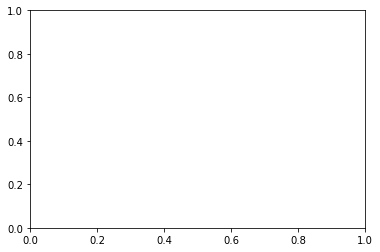

In [16]:
ax = plt.subplot()

In [20]:
ax.plot(cumprofit)

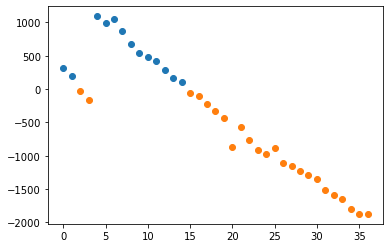

In [29]:
plt.scatter(cumprofit[cumprofit>0].index, cumprofit[cumprofit>0])
plt.scatter(cumprofit[cumprofit<=0].index, cumprofit[cumprofit<=0])

In [26]:
cumprofit[cumprofit<=0].index

Int64Index([ 2,  3, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
            30, 31, 32, 33, 34, 35, 36],
           dtype='int64')

In [27]:
cumprofit[cumprofit>0].index

Int64Index([0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [21]:
t = system.trades.log(symbol='AD')

In [22]:
t

[{'id': 1,
  'entrydate': Timestamp('2015-01-02 00:00:00'),
  'exitdate': Timestamp('2015-01-15 00:00:00'),
  'name': 'CME Australian Dollar AUD',
  'symbol': 'AD',
  'sector': 'currency',
  'position': 'Short',
  'entryprice': 0.7931002618789673,
  'entrylots': 2,
  'entryrisk': 5320.0,
  'entryrisk_ticks': 532,
  'exits': [{'exittype': 'stop',
    'exitdate': Timestamp('2015-01-15 00:00:00'),
    'exitprice': 0.8047003149986267,
    'exitlots': 2,
    'profit': -2320.0,
    'profit_ticks': -232,
    'duration': 13,
    'result': 'LOSE'}],
  '#exits': 1,
  'currentprice': 0.8047003149986267,
  'stopprice': 0.8047003149986267,
  'risk': 0.0,
  'risk_ticks': 0,
  'lots': 0,
  'flame': 0.0,
  'profit': -2320.0,
  'profit_ticks': -232,
  'duration': 13,
  'exittype': 'stop',
  'result': 'LOSE',
  'on_fire': False},
 {'id': 6,
  'entrydate': Timestamp('2015-01-16 00:00:00'),
  'exitdate': Timestamp('2015-02-26 00:00:00'),
  'name': 'CME Australian Dollar AUD',
  'symbol': 'AD',
  'sector':

In [24]:
system.trades.book[0].price_to_value(
            'AD', -1, 0.7931002618789673, 0.8047003149986267, 2)

(-2320.0, -232)

In [36]:
(0.8047003149986267 - 0.7931002618789673)

In [25]:
tickunit = instruments['AD'].tickunit

In [26]:
tickunit

5e-05

In [84]:
win_masks = []
lose_masks =[]
for idx, row in trades.iterrows():
    
    mask = (quotes['date'] >= row['entrydate']) & (quotes['date'] <= row['exitdate'])
    if row['result'] == 'WIN':
        win_masks.append(mask)
    elif row['result'] == 'LOSE':
        lose_masks.append(mask)
        
win_mask = reduce(np.logical_or, win_masks)
lose_mask = reduce(np.logical_or, lose_masks)

In [118]:
quotes

field,date,open,high,low,close,volume,oi
0,2015-01-02,0.7954,0.7970,0.7862,0.7899,58971.0,119037.0
1,2015-01-05,0.7861,0.7894,0.7821,0.7878,70446.0,123921.0
2,2015-01-06,0.7874,0.7944,0.7870,0.7894,90245.0,124545.0
3,2015-01-07,0.7864,0.7878,0.7820,0.7868,79610.0,121806.0
4,2015-01-08,0.7864,0.7920,0.7862,0.7897,74891.0,122717.0
...,...,...,...,...,...,...,...
597,2017-04-25,0.7640,0.7643,0.7592,0.7608,73095.0,104088.0
598,2017-04-26,0.7608,0.7638,0.7526,0.7539,125555.0,106783.0
599,2017-04-27,0.7547,0.7565,0.7512,0.7543,81406.0,111616.0
600,2017-04-28,0.7543,0.7563,0.7520,0.7555,78817.0,110052.0


In [101]:
trades[trades['entrydate'].duplicated()]

,entrydate,exitdate,position,entryprice,entrylots,entryrisk,#exits,profit,profit_ticks,duration,result


In [97]:
len(quotes[lose_mask])

349

In [94]:
794+195+349

1338

In [96]:
len(quotes)

1336

In [37]:
quotes = instruments.quotes()['MD'].loc['2011-05-01': '2011-07-01']
metrics = system.metrics['MD'].loc['2011-05-01': '2011-07-01']

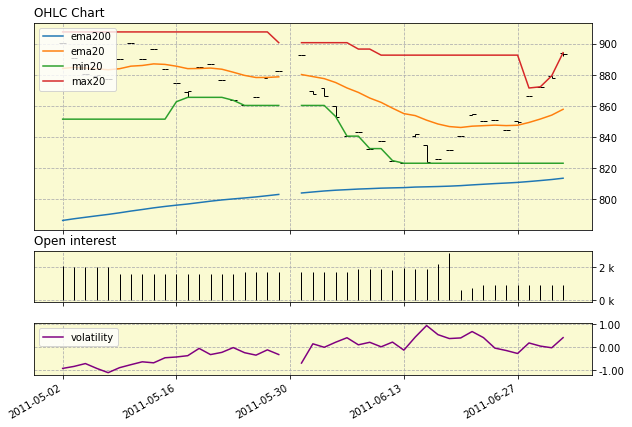

In [38]:
view(quotes, metrics=metrics)

In [6]:
system.summary(level=2)

,총손익,평균손익,표준편차,위험대비손익,승률,보유기간,매매회수
구분,,,,,,,
CBOT 10-year US Treasury Note,413580,547,1652.07,27.96%,76.1%,14.738095,756
CBOT 2-year US Treasury Note,235613,251,545.63,47.35%,83.2%,14.323749,939
CBOT 30-year US Treasury Bond,830366,1147,5798.76,30.53%,76.5%,13.803867,724
CBOT 5-year US Treasury Note,528927,491,1020.96,43.00%,79.0%,14.271123,1077
CBOT Corn,380544,338,2491.26,25.15%,74.8%,17.531972,1126
CBOT Oats,59592,298,778.20,32.38%,67.5%,12.440000,200
CBOT Soybean Meal,-456620,-603,4168.55,-17.41%,67.2%,16.109643,757
CBOT Soybean Oil,575940,504,1792.48,29.57%,77.0%,18.162730,1143
CBOT Soybeans,390504,492,4443.07,24.46%,77.4%,16.750315,793


In [7]:
system.summary(level=1)

,총손익,평균손익,표준편차,위험대비손익,승률,보유기간,매매회수
구분,,,,,,,
currency,7089184,867,3612.36,35.07%,78.2%,15.516090,8173
equity,1308275,321,6471.86,17.50%,76.5%,14.338900,4072
fiber,85945,79,5227.10,4.26%,68.4%,17.782810,1082
grain,652492,138,3344.14,15.86%,73.8%,17.012463,4734
interest-rate,2008486,575,2836.33,38.33%,79.0%,14.289474,3496
meat,816870,435,2934.21,10.72%,68.9%,17.094199,1879
metal,3026561,689,9448.22,14.27%,72.8%,16.844596,4395
petroleum,3291064,881,7932.77,23.18%,74.5%,14.011780,3735
tropical,1214033,324,5037.25,5.87%,72.7%,16.090933,3750


In [23]:
t = system.trades.log(symbol='MP')

In [26]:
s = [tr for tr in t if tr['profit']>0]

In [27]:
s

[{'id': 143453,
  'entrydate': Timestamp('2017-04-10 00:00:00'),
  'name': 'CME Mexican Peso',
  'symbol': 'MP',
  'sector': 'currency',
  'position': -1,
  'entryprice': 39817.5,
  'entrylots': 1,
  'entryrisk': 7125000.0,
  'entryrisk_ticks': 1425000,
  'exits': [{'exittype': 'stop',
    'exitdate': Timestamp('2017-04-10 00:00:00'),
    'exitprice': 39960.0,
    'exitlots': 1,
    'profit': 7125000.0,
    'profit_tick': 1425000,
    'duration': 0,
    'result': 'WIN'}],
  'currentprice': 39960.0,
  'stopprice': 39960.0,
  'risk': 0.0,
  'risk_ticks': 0,
  'lots': 0,
  'flame': -0.0,
  'profit': 7125000.0,
  'duration': 0,
  'exittype': 'stop',
  'result': 'WIN',
  'on_fire': False},
 {'id': 143573,
  'entrydate': Timestamp('2017-04-13 00:00:00'),
  'name': 'CME Mexican Peso',
  'symbol': 'MP',
  'sector': 'currency',
  'position': -1,
  'entryprice': 40145.0,
  'entrylots': 1,
  'entryrisk': 7750000.0,
  'entryrisk_ticks': 1550000,
  'exits': [{'exittype': 'stop',
    'exitdate': Tim

In [7]:
equitylog = pd.DataFrame(system.equity.log()).set_index('date')
equity = equitylog.groupby(by='date').last()

<AxesSubplot:xlabel='date'>

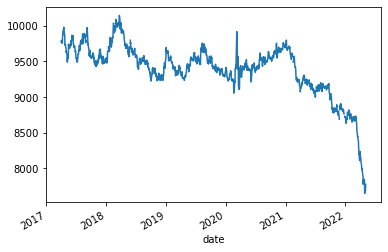

In [35]:
trader.quotes['JY'].loc['2017-04-01':]['close'].plot()

In [34]:
instruments['JY'].tickunit

0.5

In [12]:
trades = system.trades.log()

In [13]:
trades

[{'id': 1,
  'entrydate': Timestamp('2011-01-03 00:00:00'),
  'name': 'CME Australian Dollar AUD',
  'symbol': 'AD',
  'sector': 'currency',
  'position': -1,
  'entryprice': 0.8676005442619323,
  'entrylots': 2,
  'entryrisk': 1060.0,
  'entryrisk_ticks': 106,
  'exits': [{'exittype': 'stop',
    'exitdate': Timestamp('2011-02-01 00:00:00'),
    'exitprice': 0.8645004034042358,
    'exitlots': 2,
    'profit': -620.0,
    'profit_tick': -62,
    'duration': 29,
    'result': 'LOSE'}],
  'currentprice': 0.8645004034042358,
  'stopprice': 0.8645004034042358,
  'risk': 0.0,
  'risk_ticks': 0,
  'lots': 0,
  'flame': 0.0,
  'profit': -620.0,
  'duration': 29,
  'exittype': 'stop',
  'result': 'LOSE',
  'on_fire': False},
 {'id': 2,
  'entrydate': Timestamp('2011-01-03 00:00:00'),
  'name': 'CBOT Soybean Oil',
  'symbol': 'BO',
  'sector': 'grain',
  'position': -1,
  'entryprice': 64.96999389648437,
  'entrylots': 2,
  'entryrisk': 1404.0,
  'entryrisk_ticks': 117,
  'exits': [{'exittype'

In [22]:
kwargs = {'symbol':'AD', 'lots':0, 'result':'WIN'}

In [23]:
fires = []
for fire in system.trades.book:
    if all(getattr(fire, k) == v for k,v in kwargs.items()):
        fires.append(fire)

In [26]:
fires[10].result

'WIN'

In [12]:
system.symbols

['AD', 'CL', 'C', 'LC']

In [14]:
system.signals.loc['2002-01-02':]['LC']

,enter_long,enter_short,exit_long,exit_short,stop_long,stop_short
date,,,,,,
2002-01-02,False,True,True,False,174.454956,178.504974
2002-01-03,False,True,True,False,174.454956,178.654968
2002-01-04,False,True,True,False,174.454956,178.654968
2002-01-07,False,True,True,False,174.454956,178.654968
2002-01-08,False,True,True,False,174.454956,178.654968
...,...,...,...,...,...,...
2022-04-28,True,False,False,True,132.475006,140.000000
2022-04-29,True,False,False,True,132.475006,140.000000
2022-05-02,True,False,False,True,132.475006,140.000000


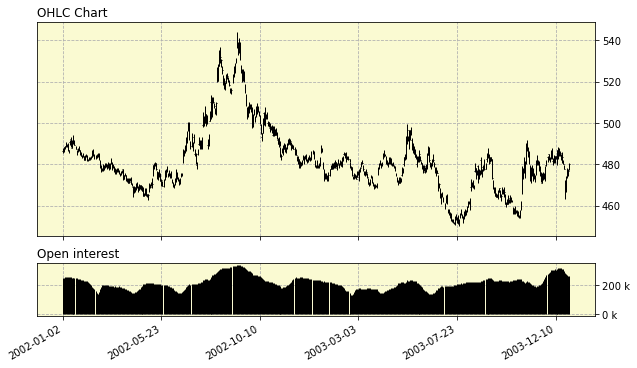

In [16]:
view(quotes)

In [21]:
quotes = trader.loc[start:end].dropna()
        tradelog = self.tradelog[self.tradelog.symbol == symbol]
        #tradelog = tradelog[tradelog.symbol == symbol]
        
        
        if start and end:
            trade = tradelog[ (start <= tradelog.entrydate) & (tradelog.exitdate <= end)]
        else:
            trade = tradelog
        
        cumprofit = trade.profit.cumsum()
        num_trades = len(trade)
        
        fig, (ax) = plt.subplots(2,1, figsize=(15,10),
                                gridspec_kw = {'height_ratios':[3,1]})
        
        #price chart
        ax[0] = ohlc_chart(ax[0], feed, linewidth=0.8)
        for idx, row in trade.iterrows():
            y=feed.loc[row['entrydate']:row['exitdate']]
            colors=['red','red'] if row['position']=='Long' else ['blue','blue']
            ax[0] = ohlc_chart(ax[0], y, colors=colors)
        ax[0].plot(feed[['top','bottom']].shift(1), color='green', linewidth=0.8)
        #tick profit chart
        ax[1].bar(np.arange(1,num_trades+1), np.where(trade.position=='Long', trade.tick, 0), 0.3, color='red', alpha=0.6 )
        ax[1].bar(np.arange(1,num_trades+1), np.where(trade.position=='Short', trade.tick, 0), 0.3, color='blue', alpha=0.6 )
           
        #labels
        name = self.pinfo[symbol]['name']
        ax[0].set_title(name, fontsize=20)
        ax[0].set_ylabel('Price', fontsize=15)
        ax[1].set_ylabel('Profit (tick)', fontsize=15)
       
        #styles
        ax[1].axhline(y=0, linewidth=1, color='darkgrey')
        ax[1].yaxis.tick_right()
        ax[1].set_facecolor('lightgoldenrodyellow')
        ax[1].set_xticks(range(1,num_trades+1))
        ax[1].grid(linestyle='--')

'NYMEX WTI Crude Oil'

In [24]:
table['duration'].mean()

35.285714285714285

In [25]:
df.columns

Index(['id', 'entrydate', 'name', 'symbol', 'sector', 'position', 'entryprice',
       'entrylots', 'entryrisk', 'entryrisk_ticks', 'exits', 'currentprice',
       'stopprice', 'risk', 'risk_ticks', 'lots', 'flame', 'profit',
       'duration', 'exittype', 'result', 'on_fire'],
      dtype='object')

In [6]:
df=pd.DataFrame(system.equity.log())

In [7]:
df2 = df.set_index('date')

In [46]:
from reportlab.pdfgen import canvas

In [57]:
def hello(c):
    c.drawString(100,100,"hello world")
    c.drawString(200,200,"안녕하세요")
    

In [58]:
c = canvas.Canvas("hello.pdf")

In [59]:
hello(c)

In [60]:
c.showPage()

In [61]:
c.save()

In [62]:
system

<<시스템: None>>

In [70]:
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter,A4
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont

fontname = 'Malgun Gothic'
pdfmetrics.registerFont(TTFont(fontname,'c:\Windows\fonts\malgun.ttf'))
p = canvas.Canvas('hello.pdf')
p.setFont(fontname,13)
p.drawString(100,100,u'안녕하세요')
p.showPage()
p.save() 

TTFError: Can't open file "c:\Windowsonts\malgun.ttf"

In [71]:
r"??df"

'??df'

In [64]:
import os

print(os.listdir(r'C:\Windows\fonts'))

['8514fix.fon', '8514fixe.fon', '8514fixg.fon', '8514fixr.fon', '8514fixt.fon', '8514oem.fon', '8514oeme.fon', '8514oemg.fon', '8514oemr.fon', '8514oemt.fon', '8514sys.fon', '8514syse.fon', '8514sysg.fon', '8514sysr.fon', '8514syst.fon', '85775.fon', '85855.fon', '85f1255.fon', '85f1256.fon', '85f1257.fon', '85f874.fon', '85s1255.fon', '85s1256.fon', '85s1257.fon', '85s874.fon', 'ahn_b.ttf', 'ahn_l.ttf', 'ahn_m.ttf', 'ALGER.TTF', 'ANTQUAB.TTF', 'ANTQUABI.TTF', 'ANTQUAI.TTF', 'app775.fon', 'app850.fon', 'app852.fon', 'app855.fon', 'app857.fon', 'app866.fon', 'app932.fon', 'app936.fon', 'app949.fon', 'app950.fon', 'arial.ttf', 'arialbd.ttf', 'arialbi.ttf', 'ariali.ttf', 'ARIALN.TTF', 'ARIALNB.TTF', 'ARIALNBI.TTF', 'ARIALNI.TTF', 'ARIALUNI.TTF', 'ariblk.ttf', 'bahnschrift.ttf', 'BASKVILL.TTF', 'batang.ttc', 'BAUHS93.TTF', 'BELL.TTF', 'BELLB.TTF', 'BELLI.TTF', 'BERNHC.TTF', 'BKANT.TTF', 'BOD_PSTC.TTF', 'BOOKOS.TTF', 'BOOKOSB.TTF', 'BOOKOSBI.TTF', 'BOOKOSI.TTF', 'BRITANIC.TTF', 'BRLNSB.TTF'

NameError: name 'FuncFormatter' is not defined

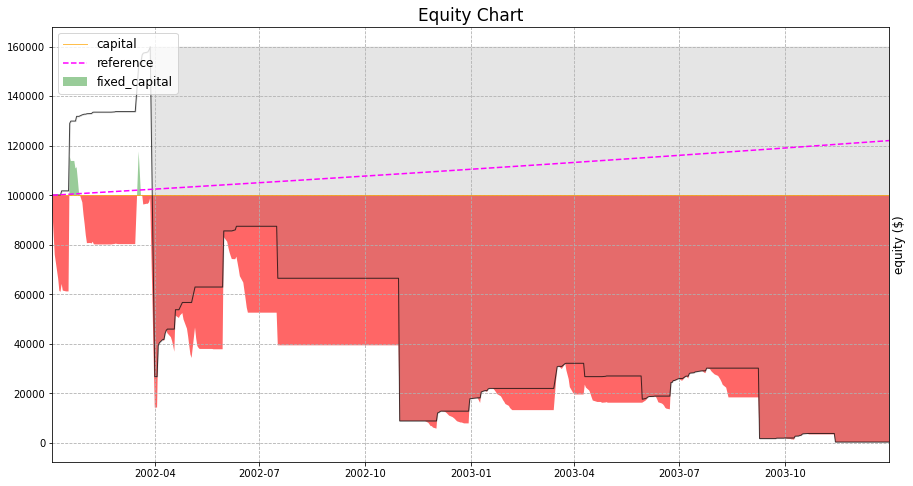

In [31]:
fig, ax = plt.subplots(1,1, figsize=(15, 8))
ax.fill_between(x,p,fixed_capital, where=fixed_capital>=p, facecolor='green', alpha=0.4, interpolate=True, label='fixed_capital')
ax.fill_between(x, p, fixed_capital, where=fixed_capital<p, facecolor='red', alpha=0.6, interpolate=True)
ax.fill_between(x, capital, max_capital, color='grey', alpha=0.2)

ax.plot(x, principal, color='orange',alpha=0.7, linewidth=1, label='capital')
ax.plot(x, capital, color='black',alpha=0.7, linewidth=1)

ax.set_xlim([x.min(), x.max()])

#reference curve
rate = 0.1 #annual interest rate
refx = (x-x[0])/np.timedelta64(365,'D')
refy = p*np.exp(rate*refx)
ax.plot(x, refy, color='magenta', linestyle='--', label='reference')

#labels
ax.legend(loc='upper left', fontsize='large')
ax.set_title('Equity Chart', fontsize=17)

#ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('equity ($)', fontsize=12)
ax.yaxis.set_label_position("right")
#style
ax.grid(linestyle='--')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.yaxis.tick_right()
fig.autofmt_xdate()
        
plt.show() 


In [11]:
class test:
    def __repr__(self):
        a={'a':1,'b':'sdf'}
        return f'{a}'

In [12]:
a=test()

In [13]:
b=[]

In [14]:
b.append(a)

In [17]:
b[0].name

11

In [16]:
a.name = 11

In [ ]:
trades = system.trades.book.statements

In [ ]:
trades = [trade for trade in trades if trade['result'] != 'REJECT']

In [ ]:
quote = trader.quotes['AD'].loc[today]

In [ ]:
quote

In [ ]:
trader.run()

In [ ]:
system.trades.book.statements

In [ ]:
price = quote['open']+round(diff*0.25)*instruments['AD'].tickunit

In [ ]:
round(price, 5)

In [ ]:
a={'b', 'c'}

In [ ]:
a['b'] = 1

In [ ]:
b['b'] = 'fffdd'

In [ ]:
a

In [ ]:
b

In [ ]:
c

In [ ]:
c.append(5)

In [ ]:
instruments.get_symbols('srf')

In [ ]:
type(trader.quotes)

In [ ]:
system.metrics.attrs['type']